In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
na_vals = ["NA", "Na", "NaN", "Missing"]
df = pd.read_csv("general_data.csv", na_values = na_vals, index_col = "EmployeeID")

In [3]:
df.drop_duplicates(inplace=True)
df.dropna(how="any", inplace=True)
df.drop(columns = ["Over18", "EmployeeCount", "StandardHours"], inplace=True)

In [4]:
df.head(15)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
3,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4
6,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,Female,4,Research Director,Married,40710,3.0,13,0,28.0,5,7,7,7
7,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,Male,2,Sales Executive,Single,58130,2.0,20,1,5.0,2,0,0,0
8,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,Male,2,Sales Executive,Married,31430,2.0,22,3,10.0,2,0,0,0
9,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,Male,3,Laboratory Technician,Married,20440,0.0,21,0,10.0,2,9,7,8


In [5]:
label_mapping = {"Yes": 1, "No": 0}
df.Attrition = df.Attrition.map(label_mapping)

In [6]:
def corr_detector(col1, col2):
    r, p = pearsonr(df[col1], df[col2])
    if not np.isnan(r):
        if abs(r)>0.5:
            print("A strong ", end="")
        else:
            print("A weak ", end="")
        if r > 0:
            print("positive correlation is found ",end="")
            string = f"as {col1} increases, {col2} increases"
        else:
            print("negative correlation is found ",end="")
            string = f"as {col1} increases, {col2} decreases"
            
        print("with r =", (r / 10).round(6) * 10)
        #didn't use round() method directly as round() can't round integers
        print("Hence "+string)
        
        plt.scatter(df[col1], df[col2])
        plt.title(f"{col1} vs {col2}")
        plt.xlabel(col1)
        plt.ylabel(col2)
    else:
        print("No correlation is found")


<h2>Correlation 1:</h2>
<p style = "font-size: 20px">Checking the correlation between Age and Attrition variables</p>

A weak negative correlation is found with r = -0.15921000000000002
Hence as Age increases, Attrition decreases


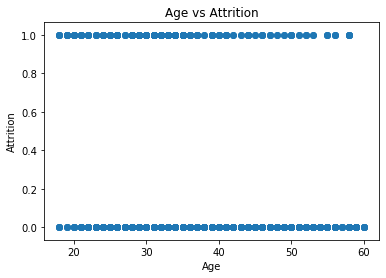

In [7]:
corr_detector("Age", "Attrition")

<h2>Correlation 2:</h2>
<p style = "font-size: 20px">Checking the correlation between TrainingTimesLastYear and Attrition variables</p>

A weak negative correlation is found with r = -0.04943
Hence as TrainingTimesLastYear increases, Attrition decreases


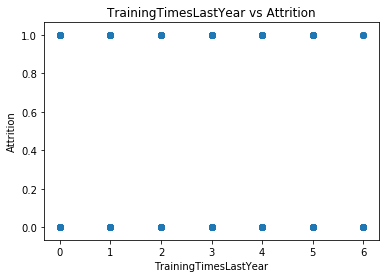

In [8]:
corr_detector("TrainingTimesLastYear", "Attrition")

<h2>Correlation 3:</h2>
<p style = "font-size: 20px">Checking the correlation between Education and Attrition variables</p>

A weak negative correlation is found with r = -0.01511
Hence as Education increases, Attrition decreases


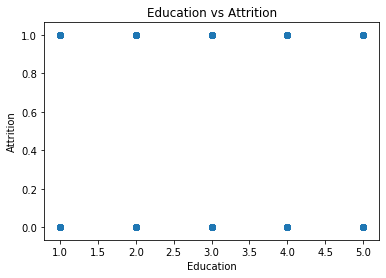

In [9]:
corr_detector("Education", "Attrition")

<h2>Correlation 4:</h2>
<p style = "font-size: 20px">Checking the correlation between BusinessTravel and Attrition variables</p>

In [10]:
label_mapping = {"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently": 2}
df.BusinessTravel = df.BusinessTravel.map(label_mapping)

A weak positive correlation is found with r = 0.12701
Hence as BusinessTravel increases, Attrition increases


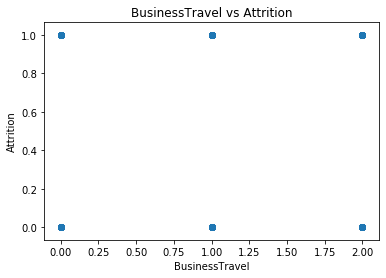

In [11]:
corr_detector("BusinessTravel", "Attrition")

<h2>Correlation 5:</h2>
<p style = "font-size: 20px">Checking the correlation between JobLevel and Attrition variables</p>

A weak negative correlation is found with r = -0.01029
Hence as JobLevel increases, Attrition decreases


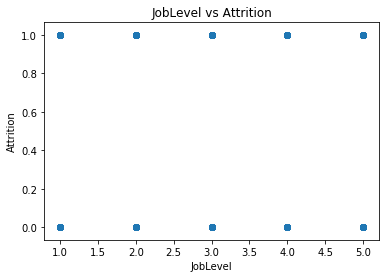

In [12]:
corr_detector("JobLevel", "Attrition")

<h2>Correlation 6:</h2>
<p style = "font-size: 20px">Checking the correlation between MonthlyIncome and Attrition variables</p>

A weak negative correlation is found with r = -0.03118
Hence as MonthlyIncome increases, Attrition decreases


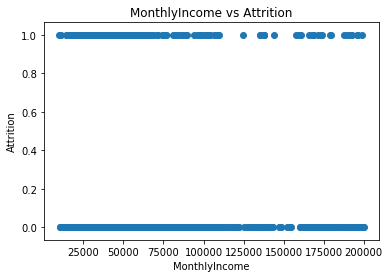

In [13]:
corr_detector("MonthlyIncome", "Attrition")

<h2>Correlation 7:</h2>
<p style = "font-size: 20px">Checking the correlation between YearsSinceLastPromotion and Attrition variables</p>

A weak negative correlation is found with r = -0.03302
Hence as YearsSinceLastPromotion increases, Attrition decreases


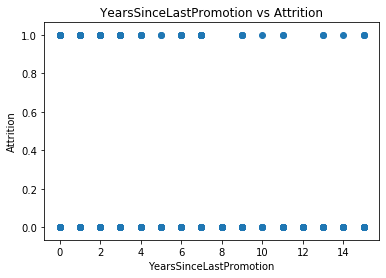

In [14]:
corr_detector("YearsSinceLastPromotion", "Attrition")

<h2>Correlation 8:</h2>
<p style = "font-size: 20px">Checking the correlation between YearsWithCurrManager and Attrition variables</p>

A weak negative correlation is found with r = -0.1562
Hence as YearsWithCurrManager increases, Attrition decreases


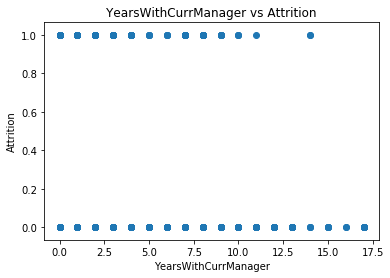

In [15]:
corr_detector("YearsWithCurrManager", "Attrition")

<h2>Correlation 9:</h2>
<p style = "font-size: 20px">Checking the correlation between YearsAtCompany and Attrition variables</p>

A weak negative correlation is found with r = -0.13439
Hence as YearsAtCompany increases, Attrition decreases


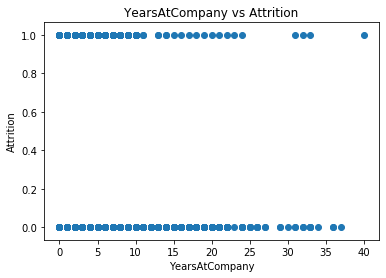

In [16]:
corr_detector("YearsAtCompany", "Attrition")

<h2>Correlation 10:</h2>
<p style = "font-size: 20px">Checking the correlation between StockOptionLevel and Attrition variables</p>

A weak negative correlation is found with r = -0.17106
Hence as TotalWorkingYears increases, Attrition decreases


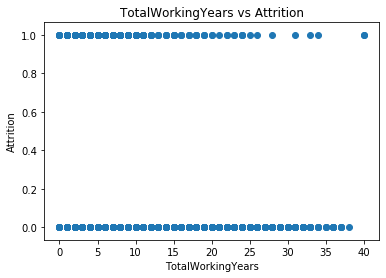

In [17]:
corr_detector("TotalWorkingYears", "Attrition")

A weak negative correlation is found with r = -0.01511
Hence as Education increases, Attrition decreases


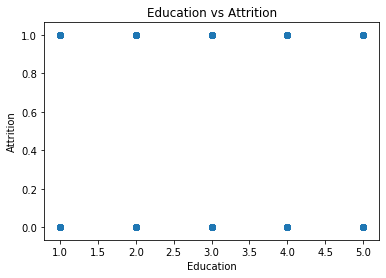

In [18]:
corr_detector("Education", "Attrition")